Task 1 : House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Reading the data set
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#Checking for any null values in the dataset
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
#Encoding the features values since machine learning models can't accept the texts as inputs
from sklearn.preprocessing import LabelEncoder
road = LabelEncoder()
room = LabelEncoder()
base = LabelEncoder()
hot = LabelEncoder()
air = LabelEncoder()
area = LabelEncoder()
df["mainroad"] = road.fit_transform(df["mainroad"])
df["guestroom"] = room.fit_transform(df["guestroom"])
df["basement"] = base.fit_transform(df["basement"])
df["hotwaterheating"] = hot.fit_transform(df["hotwaterheating"])
df["airconditioning"] = air.fit_transform(df["airconditioning"])
df["prefarea"] = area.fit_transform(df["prefarea"])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [5]:
#Applying the ordinal encoding as it requires to maintain the order
from sklearn.preprocessing import OrdinalEncoder
status = OrdinalEncoder()

df["furnishingstatus"] = status.fit_transform(df[["furnishingstatus"]])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0.0


In [6]:
# Scaling the area values as they are in large deiffernce comparing to other features values
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
df["area"] = mx.fit_transform(df[["area"]])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,4,2,3,1,0,0,0,1,2,1,0.0
1,12250000,0.502405,4,4,4,1,0,0,0,1,3,0,0.0
2,12250000,0.571134,3,2,2,1,0,1,0,0,2,1,1.0
3,12215000,0.402062,4,2,2,1,0,1,0,1,3,1,0.0
4,11410000,0.396564,4,1,2,1,1,1,0,1,2,0,0.0


In [7]:
cor_data = df.corr()
cor_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


<Axes: >

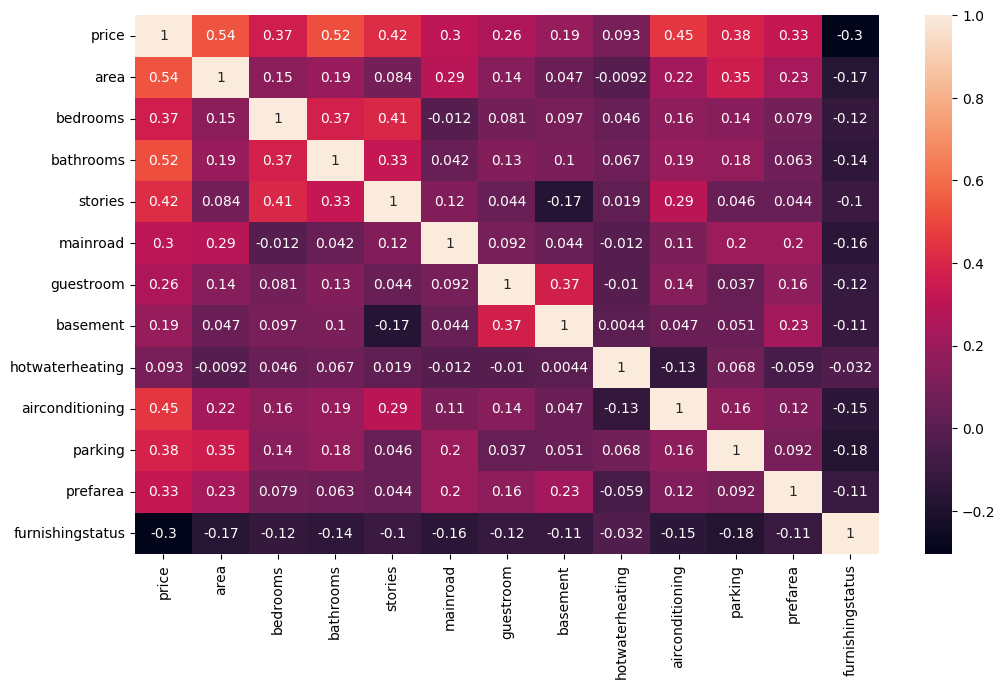

In [8]:
#Here is the correlation matrix of all the features in the given data set
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(12,7))
sn.heatmap(cor_data, annot=True)

In [9]:
X = df.drop("price", axis=1)
y = df["price"]
X.shape, y.shape


((545, 12), (545,))

In [10]:
y[:5]

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [11]:
#Splitting the data using train_test_split module

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train.shape, x_test.shape

((436, 12), (109, 12))

In [12]:
#Training the model using Linear Regression

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [13]:
reg.score(x_test, y_test)

0.6183140939593386

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ran = RandomForestRegressor(n_estimators=100)
dec = DecisionTreeRegressor()

models = {
    "RandomForest" : ran,
    "DesisionTree": dec,
    "LinearRegression" : reg,
    "KNN": KNeighborsRegressor(),
    "L1 Regularisation": linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
}

In [15]:
#Training the dataset with different types of models
scores = []
for name, var in models.items():
    var.fit(x_train, y_train)
    y_predict = var.predict(x_test)
    scores.append({
        "Model_name": name,
        "Test Accuracy": var.score(x_test, y_test), 
        "MSE" : mean_squared_error(y_test, y_predict),
        "MAE" : mean_absolute_error(y_test, y_predict),
        "R2" : r2_score(y_test, y_predict)
        
    })
df1 = pd.DataFrame(scores)
df1

,Model_name,Test Accuracy,MSE,MAE,R2
0,RandomForest,0.645243,1.489692e+12,8.923175e+05,0.645243
1,DesisionTree,0.438919,2.356088e+12,1.079638e+06,0.438919
2,LinearRegression,0.618314,1.602774e+12,8.986293e+05,0.618314
3,KNN,0.632920,1.541442e+12,8.827727e+05,0.632920
4,L1 Regularisation,0.618296,1.602850e+12,8.985917e+05,0.618296


In [16]:
#we can see that, Random foredst classifier has the maximum accuracy among all the models

ran.fit(x_train, y_train)
ran.score(x_test, y_test)

0.6442625377510494

In [17]:
y_pred =  ran.predict(x_test)
y_pred[:5]

array([7494480., 5935615., 7779310., 6243230., 4297160.])